In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


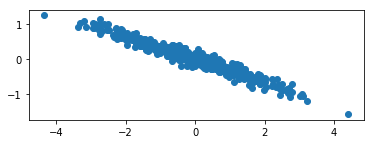

In [2]:
mu, sigma1, sigma2 = 0, 0.1, 1.4 # mean and standard deviation
s1 = np.random.normal(mu, sigma1, 500)
s2 = np.random.normal(mu, sigma2, 500)

alpha = -2.*np.pi*0.2

x=s1*np.cos(alpha)+s2*np.sin(alpha)
y=-s1*np.sin(alpha)+s2*np.cos(alpha)

X = np.transpose([x,y])

plt.scatter(x,y)
plt.axes().set_aspect('equal')

In [3]:
np.shape(X)

(500, 2)

In [3]:
pca = PCA(n_components=2)

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'PCA2')

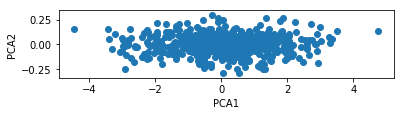

In [5]:
Xt = pca.transform(X)
plt.scatter(Xt[:,0],Xt[:,1])
plt.axes().set_aspect(3)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

In [6]:
# Covariance matrices
print(np.cov(X.T))
print(np.cov(Xt.T))

[[ 1.78529259 -0.58237818]
 [-0.58237818  0.20157437]]
[[ 1.97639084e+00 -4.36079585e-17]
 [-4.36079585e-17  1.04761066e-02]]


In [7]:
ev=pca.transform([[1.,0.],[0.,1.]])
ev

array([[ 1.01741939, -0.31227421],
       [-0.24451386, -0.95065065]])

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


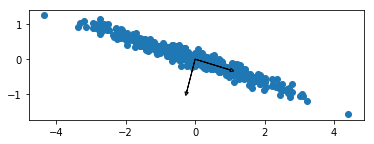

In [8]:
plt.scatter(x,y)
plt.arrow(0,0,ev[0,0],ev[0,1],head_width=0.1, head_length=0.1)
plt.arrow(0,0,ev[1,0],ev[1,1],head_width=0.1, head_length=0.1)
plt.axes().set_aspect('equal')
plt.show()

# Ising

In [9]:
import pickle,os

root='/Users/sven.krippendorf/Nextcloud/ml_physics_lectures/literatureandmaterial/'

def read_t(root="./"):
    data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=All.pkl','rb'))
    return np.unpackbits(data).astype(int).reshape(-1,1600)

In [10]:
X = read_t(root=root)

In [11]:
#np.random.seed(0) # fixing the random seed

idx = np.arange(len(X))
tval = np.hstack([t]*10000 for t in np.arange(0.25,4.01,0.25)) # Temperature values for each sample
rand = np.random.choice(idx, size=5000, replace=False)
Xdownsample = X[rand]
modelPCA = PCA(n_components=2)
XPCA = modelPCA.fit_transform(Xdownsample)
component1 = modelPCA.components_[0]
tval = tval[rand]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.


In [12]:
np.shape(Xdownsample)

(5000, 1600)

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


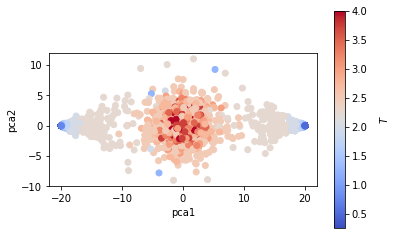

In [13]:
plt.scatter(XPCA[:,0],XPCA[:,1],c=tval,cmap="coolwarm") 
plt.xlabel('pca1')
plt.ylabel('pca2')
cb = plt.colorbar()
cb.set_label(label='$T$',labelpad=10)
plt.axes().set_aspect('equal')
plt.show()

In [15]:
def magnetization(data):
    configuration = data
    magnetization = np.sum(np.sum(configuration,axis=2),axis=1)
    return magnetization

#magnetization = sum of all individual spins

In [16]:
L=40
Xreshape=Xdownsample.reshape(len(Xdownsample),L,L)

Text(0, 0.5, 'PCA1')

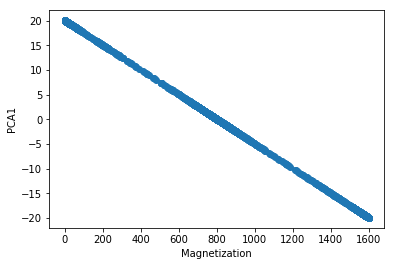

In [18]:
plt.scatter(magnetization(Xreshape),XPCA[:,0])
plt.xlabel('Magnetization')
plt.ylabel('PCA1')